In [1]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4"  \
  --checkpointing_steps=5000 \
  --train_text_encoder \
  --instance_data_dir="./dog" \
  --class_data_dir="/root/autodl-tmp/hello2mao/models/dog_text2img/class_images" \
  --output_dir="/root/autodl-tmp/hello2mao/models/dog_text2img" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="a photo of sks dog" \
  --class_prompt="a photo of dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=200 \
  --max_train_steps=800


[16:29:59] WARNING  The following values were not passed to       ]8;id=133948;file:///root/miniconda3/lib/python3.8/site-packages/accelerate/commands/launch.py\launch.py]8;;\:]8;id=147623;file:///root/miniconda3/lib/python3.8/site-packages/accelerate/commands/launch.py#1077\1077]8;;\
                    `accelerate launch` and had defaults used                   
                    instead:                                                    
                            `--num_processes` was set to a value                
                    of `1`                                                      
                            `--num_machines` was set to a value                 
                    of `1`                                                      
                            `--mixed_precision` was set to a                    
                    value of `'no'`                                             
                            `--dynamo_backend` was set to 

In [ ]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="SkyWork/SkyPaint"  \
  --checkpointing_steps=5000 \
  --train_text_encoder \
  --instance_data_dir="./dog" \
  --class_data_dir="/root/autodl-tmp/hello2mao/models/dog_text2img_cn/class_images" \
  --output_dir="/root/autodl-tmp/hello2mao/models/dog_text2img_cn" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="一张黄啦啦的狗的照片" \
  --class_prompt="一张狗的照片" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=200 \
  --max_train_steps=800

In [ ]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4"  \
  --train_text_encoder \
  --instance_data_dir="./dog" \
  --output_dir="/root/autodl-tmp/models/dog_text2img" \
  --instance_prompt="a photo of sks dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=400  

In [4]:
from PIL import Image


def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid


# num_samples = 4
# image_grid(dataset["image"][:num_samples], rows=1, cols=num_samples)

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


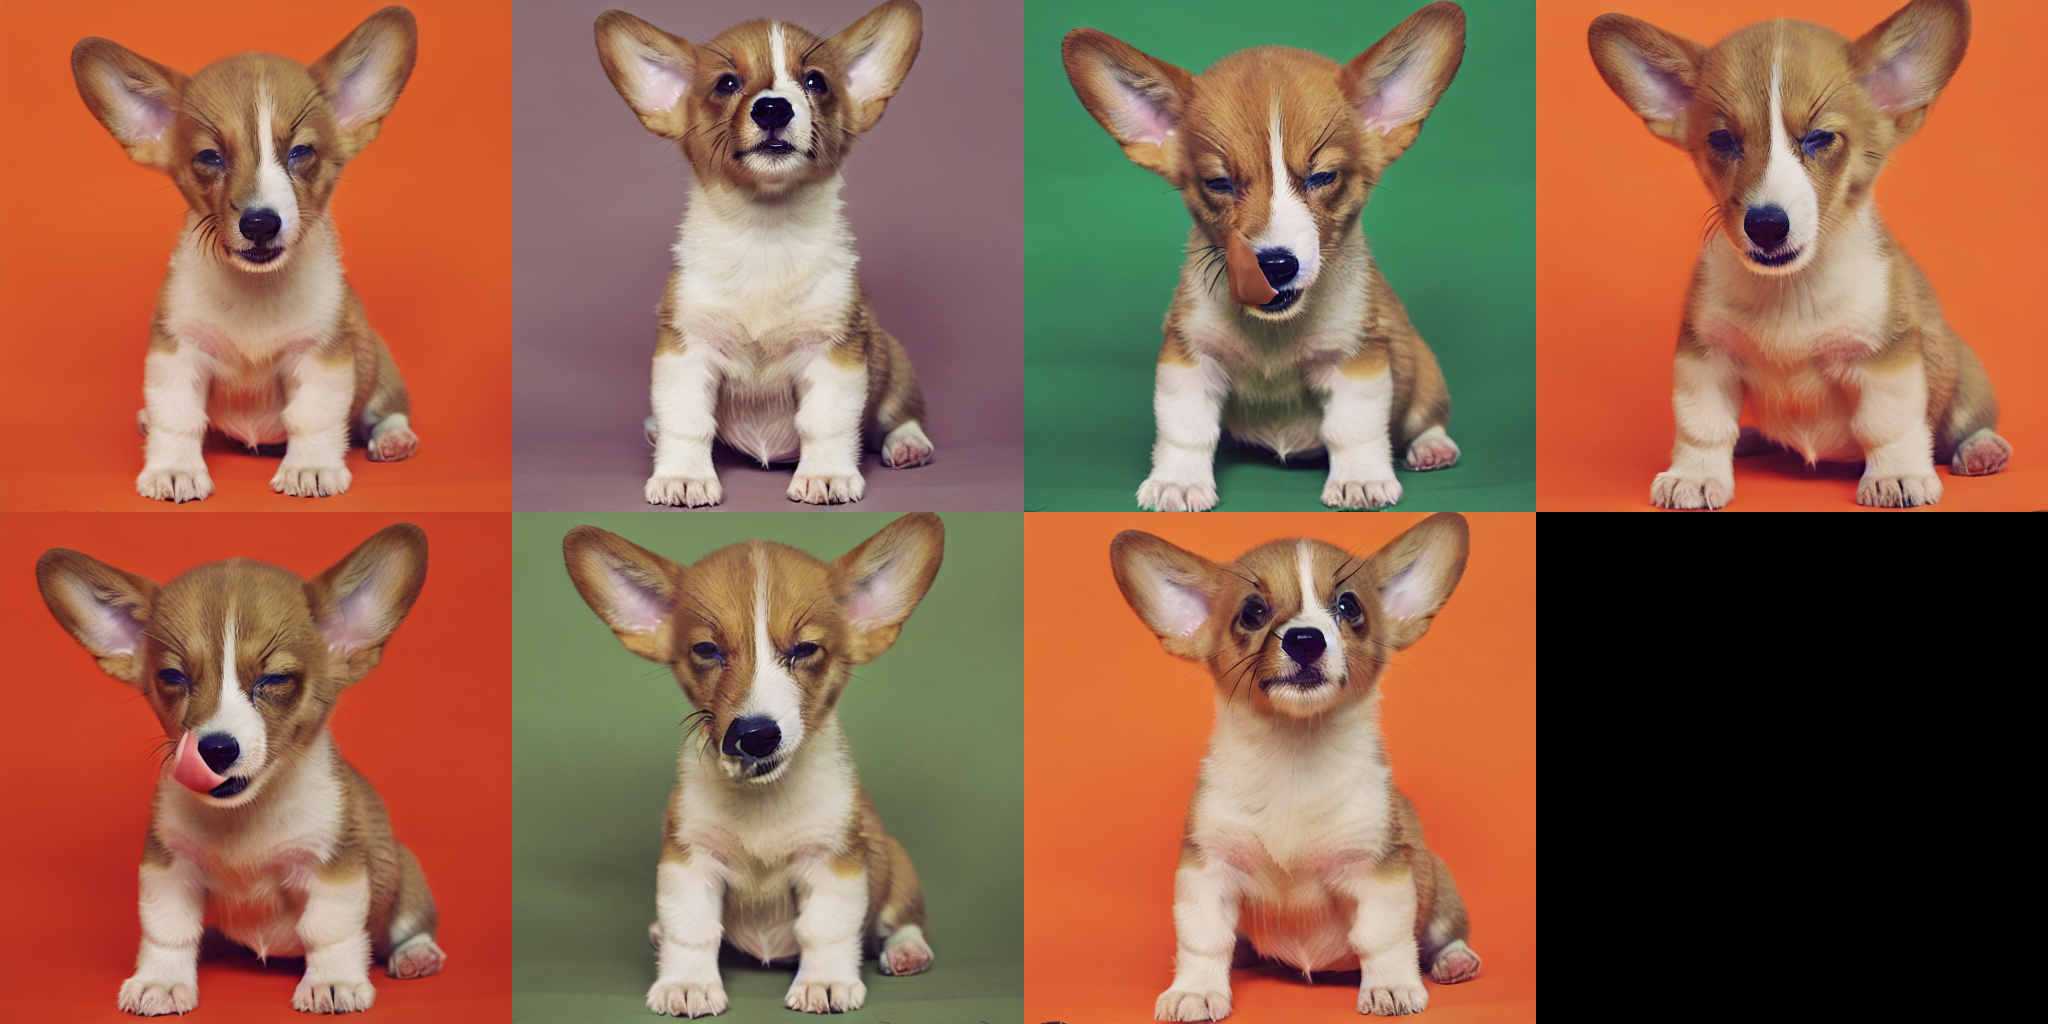

In [8]:
from diffusers import StableDiffusionPipeline
import torch



model_id = "/root/autodl-tmp/hello2mao/models/dog_text2img"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=torch.float16,
    ).to("cuda")

prompt = "a photo of sks dog is sleeping"
images = pipe(prompt,     
    num_images_per_prompt=8,
    num_inference_steps=50, 
    guidance_scale=7.5).images
image_grid(images, rows=2, cols=4)

In [ ]:
from accelerate import Accelerator
from diffusers import DiffusionPipeline

# Load the pipeline with the same arguments (model, revision) that were used for training
model_id = "CompVis/stable-diffusion-v1-4"
pipeline = DiffusionPipeline.from_pretrained(model_id)

accelerator = Accelerator()

# Use text_encoder if `--train_text_encoder` was used for the initial training
unet, text_encoder = accelerator.prepare(pipeline.unet, pipeline.text_encoder)

# Restore state from a checkpoint path. You have to use the absolute path here.
accelerator.load_state("/sddata/dreambooth/daruma-v2-1/checkpoint-100")

# Rebuild the pipeline with the unwrapped models (assignment to .unet and .text_encoder should work too)
pipeline = DiffusionPipeline.from_pretrained(
    model_id,
    unet=accelerator.unwrap_model(unet),
    text_encoder=accelerator.unwrap_model(text_encoder),
)